In [1]:
# libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
# reading dataset

df = pd.read_csv('/home/pedro/bkp/code/dataset/INFLUD-21-09-2020.csv',sep=';',encoding = "ISO-8859-1")


# Hospitalized people with age small than 110:
df = df[df['PCR_SARS2']==1][df['HOSPITAL']==1][df['NU_IDADE_N']<=110][df['EVOLUCAO'] != 3][df['EVOLUCAO'] != 9][df['EVOLUCAO'].notnull()]
print(df.shape)


# Macro Regions

northeast  =  set(['MA','PI','BA','CE','RN','PB','PE','AL','SE'])
north  =  set(['RO','AC','AM','RR','PA','AP','TO'])
midwest  =  set(['MT','MS','GO','DF'])
southeast  =  set(['SP','RJ','MG','ES'])
south = set(['RS','SC','PR'])


#df = df[df['SG_UF_NOT'].isin(northeast)]
#df = df[df['SG_UF_NOT'].isin(north)]
#df = df[df['SG_UF_NOT'].isin(midwest)]
#df = df[df['SG_UF_NOT'].isin(southeast)]
df = df[df['SG_UF_NOT'].isin(south)]






print('confirmed data:',df.shape[0])

/home/pedro/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (15,60,62,63,64,92,94,108,117,121,123) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
<ipython-input-2-f43c89878083>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['PCR_SARS2']==1][df['HOSPITAL']==1][df['NU_IDADE_N']<=110][df['EVOLUCAO'] != 3][df['EVOLUCAO'] != 9][df['EVOLUCAO'].notnull()]
<ipython-input-2-f43c89878083>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['PCR_SARS2']==1][df['HOSPITAL']==1][df['NU_IDADE_N']<=110][df['EVOLUCAO'] != 3][df['EVOLUCAO'] != 9][df['EVOLUCAO'].notnull()]
<ipython-input-2-f43c89878083>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['PCR_SARS2']==1][df['HOSPITAL']==1][df['NU_IDADE_N']<=110][df['EVOLUCAO'] != 3][df['EVOLUCA

(242679, 154)
confirmed data: 29040


In [3]:
df = df[['NU_IDADE_N','CS_RACA','EVOLUCAO']]


In [4]:
# boxing the age feature

bins = [0, 40, 50, 60, 70, 150]
names = ['<40', '40-50', '50-60','60-70','>=70']


df['NU_IDADE_N'] = pd.cut(df['NU_IDADE_N'], bins=bins, labels=names, right= False)

df['NU_IDADE_N'] = df['NU_IDADE_N'].replace({'<40': int(40), '40-50':int(50), '50-60':int(60), '60-70':int(70), '>=70':int(80)})



In [5]:
print(df['NU_IDADE_N'].value_counts())

80    8854
70    6173
60    5558
50    4266
40    4189
Name: NU_IDADE_N, dtype: int64


In [6]:
print(df['NU_IDADE_N'].isna().sum())

0


In [7]:
# Normalization

white = df['NU_IDADE_N'][((df['CS_RACA'] == 1)& ((df['EVOLUCAO']==1) |(df['EVOLUCAO']==2)))].value_counts().sort_index(ascending=True)
black = df['NU_IDADE_N'][((df['CS_RACA'] == 2)& ((df['EVOLUCAO']==1) |(df['EVOLUCAO']==2)))].value_counts().sort_index(ascending=True)
yellow = df['NU_IDADE_N'][((df['CS_RACA'] == 3)& ((df['EVOLUCAO']==1)|(df['EVOLUCAO']==2)))].value_counts().sort_index(ascending=True)
brown = df['NU_IDADE_N'][((df['CS_RACA'] == 4)& ((df['EVOLUCAO']==1) |(df['EVOLUCAO']==2)))].value_counts().sort_index(ascending=True)

print(white)

40    3044
50    3165
60    4185
70    4785
80    6928
Name: NU_IDADE_N, dtype: int64


In [8]:
# Death and Cure patients divided by color and age bins

# Death
white_dea = df['NU_IDADE_N'][((df['CS_RACA'] == 1)&(df['EVOLUCAO']==2))].value_counts().sort_index(ascending=True)
black_dea = df['NU_IDADE_N'][((df['CS_RACA'] == 2)&(df['EVOLUCAO']==2))].value_counts().sort_index(ascending=True)
yellow_dea = df['NU_IDADE_N'][((df['CS_RACA'] == 3)&(df['EVOLUCAO']==2))].value_counts().sort_index(ascending=True)
brown_dea = df['NU_IDADE_N'][((df['CS_RACA'] == 4)&(df['EVOLUCAO']==2))].value_counts().sort_index(ascending=True)

# Cured
white_cur = df['NU_IDADE_N'][((df['CS_RACA'] == 1)&(df['EVOLUCAO']==1))].value_counts().sort_index(ascending=True)
black_cur = df['NU_IDADE_N'][((df['CS_RACA'] == 2)&(df['EVOLUCAO']==1))].value_counts().sort_index(ascending=True)
yellow_cur = df['NU_IDADE_N'][((df['CS_RACA'] == 3)&(df['EVOLUCAO']==1))].value_counts().sort_index(ascending=True)
brown_cur = df['NU_IDADE_N'][((df['CS_RACA'] == 4)&(df['EVOLUCAO']==1))].value_counts().sort_index(ascending=True)

print(white_cur)

40    2822
50    2756
60    3379
70    3102
80    3100
Name: NU_IDADE_N, dtype: int64


In [9]:
print(white_cur.index)

Int64Index([40, 50, 60, 70, 80], dtype='int64')


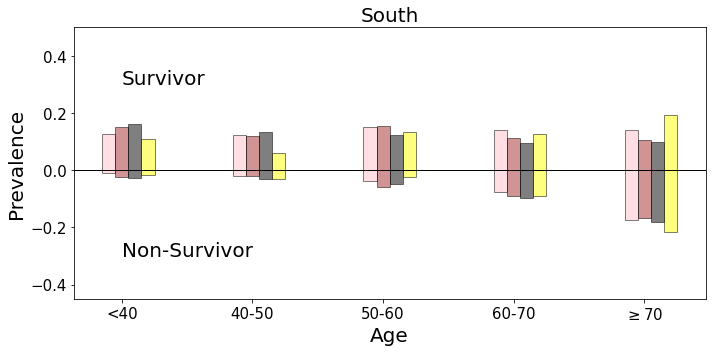

In [10]:
# Plotting graphic

barWidth = 1

plt.figure(figsize=(10,5))

plt.bar(white_cur.index-1, white_cur/white.sum(), color='pink', alpha =0.5, width=barWidth, edgecolor='black',linewidth=1)
plt.bar(brown_cur.index, brown_cur/brown.sum(), color='brown', alpha =0.5, width=barWidth, edgecolor='black',linewidth=1)
plt.bar(black_cur.index+1, black_cur/black.sum(), color='black', alpha =0.5, width=barWidth, edgecolor='black',linewidth=1)
plt.bar(yellow_cur.index+2, yellow_cur/yellow.sum(), color='yellow', alpha =0.5, width=barWidth, edgecolor='black',linewidth=1)

plt.bar(white_dea.index-1, -white_dea/white.sum(), color='pink',alpha =0.5,width=barWidth, edgecolor='black', label='Branca',linewidth=1)
plt.bar(brown_dea.index, -brown_dea/brown.sum(), color='brown', alpha =0.5,width=barWidth, edgecolor='black', label='Parda',linewidth=1)
plt.bar(black_dea.index+1, -black_dea/black.sum(), color='black', alpha =0.5, width=barWidth, edgecolor='black', label='Preta',linewidth=1)
plt.bar(yellow_dea.index+2, -yellow_dea/yellow.sum(), color='yellow', alpha =0.5, width=barWidth, edgecolor='black', label='Amarela',linewidth=1)


#plt.legend(fontsize=15,loc='upper right')
#plt.title('Northeast', fontsize=20)
#plt.title('North', fontsize=20)
#plt.title('Midwestern', fontsize=20)
#plt.title('Southwest', fontsize=20)
plt.title('South', fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Prevalence', fontsize=20)
plt.xlabel('Age', fontsize=20)
x = [40, 50, 60, 70, 80]
plt.xticks(x, ('<40', '40-50', '50-60','60-70','$\geq$70'))
plt.ylim(-0.45,0.5)
plt.text(40, 0.3, 'Survivor', fontsize=20)
plt.text(40, -0.3, 'Non-Survivor', fontsize=20)
plt.axhline(y=0,linewidth=1,color='k')
plt.tight_layout()
#plt.savefig('northeast_age.pdf')
#plt.savefig('north_age.pdf')
#plt.savefig('midwestern_age.pdf')
#plt.savefig('southeast_age.pdf')
plt.savefig('south_age.pdf')
plt.show()

